# AWeSoMe Lab Intro and Setup Assignment Notebook

This is the Jupyter notebook for the HMC AWeSoMe Lab Intro and Setup Assignment "Hello, Convokit" ([writeup here](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?usp=sharing)). Solutions to coding questions _and_ written questions should be put here (you can use markdown cells for the written questions).

## Part 1: Load a Corpus!

See the [writeup for Part 1](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.yhpnne8a6ns3) before continuing.

In [43]:
from convokit import Corpus, download, FightingWords

In [44]:
reddit_corpus = Corpus(filename=download("reddit-corpus-small"))

Dataset already exists at /home/mputzer/.convokit/saved-corpora/reddit-corpus-small


In [45]:
reddit_corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


## Part 2: Re-implement print_summary_stats

See the [writeup for Part 2](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.jz5jp4t11fwd) before continuing.

In [ ]:
# Here's how you would iterate over Speakers:
n_speakers = 0
for speaker in reddit_corpus.iter_speakers():
    n_speakers += 1
print(n_speakers)

TASK: In the two code cells below, modify the provided code to count Utterances and Speakers.

In [ ]:
print(reddit_corpus.iter_speakers())

In [ ]:
def n_in_list(list):
    '''
    Iterates over list and gives the number of items in the corpus
    '''
    n_speakers = 0
    for speaker in list:
        n_speakers += 1
    return n_speakers

print(n_in_list(reddit_corpus.iter_speakers()))
print(n_in_list(reddit_corpus.iter_conversations()))
print(n_in_list(reddit_corpus.iter_utterances()))


## Part 3: Working with metadata

See the [writeup for Part 3](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ciwzim5uquvi) before continuing.

In [ ]:
# Here's an example of accessing Conversation metadata
# (demonstrated on a randomly selected Conversation)
c = reddit_corpus.random_conversation()
print(c.meta["gilded"])

TASK: Using conversation-level metadata and the iterators you practiced in Part 2, compute (a) the total number of subreddits in the Corpus, and (b) the 5 subreddits with the most conversations (along with the exact number of conversations in each of those 5 subreddits).

In [ ]:

subreddits = {}

for post in reddit_corpus.iter_conversations():
    temp_sub = post.meta["subreddit"]

    # count number of posts per subreddit
    if temp_sub in subreddits:
        subreddits[temp_sub] = subreddits.get(temp_sub) + 1
    else:
        subreddits[temp_sub] = 1


print("The number of subreddits is " + str(len(subreddits)))
print("the top five subreddits are "+ str(sorted(subreddits, key=subreddits.get, reverse=True)[:5]))

print(subreddits)

## Part 4: Transformers, roll out!

See the [writeup for Part 4](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.lhawg1ufgxev) before continuing.

In [ ]:
# Here's an example of applying a simple Transformation
# (the TextCleaner, which does basic text standardization such as lowercasing everything)
from convokit import TextCleaner
cleaner = TextCleaner(replace_text=False)
# reddit_corpus = cleaner.transform(reddit_corpus)
# utt = reddit_corpus.random_utterance()
# print("Original text:", utt.text)
# print("Cleaned text:", utt.meta["cleaned"])

TASK: Use the [Fighting Words Transformer](https://convokit.cornell.edu/documentation/fightingwords.html) to generate a plot comparing the usage of words in the subreddits "nfl" and "programming".

In [ ]:
# write code that applies the fightingwords transformer to the reddit corpus to compare the language 
# used in the subreddits "nfl" and "programming". Produce plot showing differences

fw = FightingWords(ngram_range=(1,1))

fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'nfl',
                      class2_func=lambda utt: utt.meta['subreddit'] == 'programming')

df = fw.summarize(reddit_corpus, plot=True, class1_name='r/nfl', class2_name='r/programming')

df

## Part 5: Your turn!

See the [writeup for Part 5](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ep64m0asidvd) before continuing.

Before you write any code, please write down in this text cell what groups you have chosen to compare, and what hypotheses you came up with beforehand.

In [ ]:
# Add your code here.
# (You may also add as many additional code cells as you want)

#compare AskMen and AskWomen

subreddits = {}


for post in reddit_corpus.iter_utterances():
    temp_sub = (post.meta["subreddit"], post.meta["author_flair_text"]) if (post.meta["subreddit"] == "AskMen" or post.meta["subreddit"] == "AskWomen") else None

    # count number of posts per subreddit
    if temp_sub in subreddits:
        subreddits[temp_sub] = subreddits.get(temp_sub) + 1
    else:
        subreddits[temp_sub] = 1

print("the top five subreddits are "+ str(sorted(subreddits.items(), key=lambda item: item[1])))

print(subreddits)

#Compare symbol male vs. female
#Female vs male (lump specific similar flairs)
#No flair compare

In [ ]:

fw = FightingWords(ngram_range=(1,1))


fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'AskMen',
                      class2_func=lambda utt: utt.meta['subreddit'] == 'AskWomen' and utt.meta['gilded'] == 1)
                      
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/AskMen', class2_name='r/AskWomen gilded')

df


Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1 valid corpus components. class2_func returned 2387 valid corpus components.
Vocab size is 878
Comparing language...
ngram zscores computed.


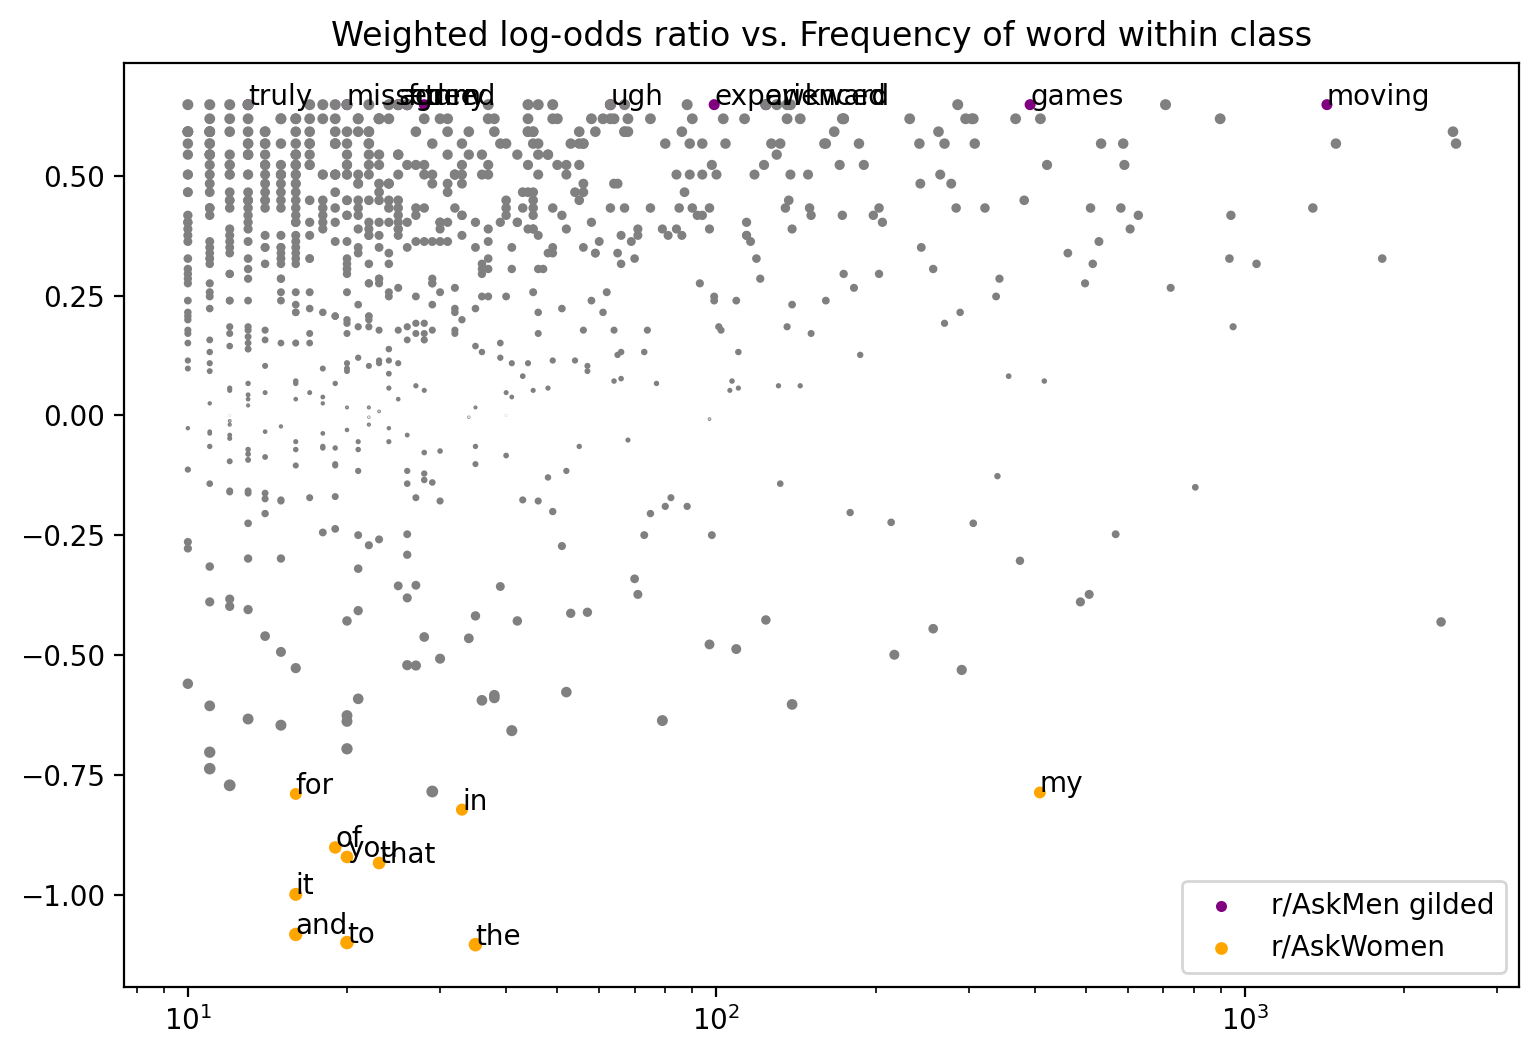

,z-score,class
ngram,,
the,-1.103861,r/AskWomen
to,-1.099514,r/AskWomen
and,-1.082522,r/AskWomen
it,-0.998957,r/AskWomen
that,-0.933603,r/AskWomen
...,...,...
funny,0.648149,r/AskMen gilded
missed,0.648149,r/AskMen gilded
games,0.648149,r/AskMen gilded


In [46]:
fw = FightingWords(ngram_range=(1,1))


fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'AskMen' and utt.meta['gilded'] == 1,
                      class2_func=lambda utt: utt.meta['subreddit'] == 'AskWomen')
                      
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/AskMen gilded', class2_name='r/AskWomen')

df

This is our preprocessing imports stage

In [51]:
import nltk
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# print(stopwords.words('english'))

# from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()


# stop_words = set(stopwords.words('english'))
# stop_words.update(["gt", "removed", "http", "to"])



[nltk_data] Downloading package punkt to /home/mputzer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mputzer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mputzer/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mputzer/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from nltk import pos_tag, word_tokenize

example_sentence = "Apple Inc. is planning to open a new store in San Francisco."
tokens = word_tokenize(example_sentence)
pos_tags = pos_tag(tokens)
print(f'The first 5 POS tags are: {pos_tags[:5]}')

In [40]:
# code inspired from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/


# Insert into for loop
example_sent = """This is a sample sentence,
               showing off the stop words filtration."""


word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether
# they are present in stop_words or not
filtered_sentence = [w for w in word_tokens] #if not w.lower() in stop_words]
print(word_tokens)
print(filtered_sentence)


# Modify our corpus to not include text with these stop words, pass this corpus to fighting words below


['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']


This is the Preprocessing stage: We originally had stop words in here, and now we have lemmatization

In [ ]:
# Iterate through text of conversations
for post in reddit_corpus.iter_utterances():
   if post.meta["subreddit"] == "AskMen" or post.meta["subreddit"] == "AskWomen":


       text = post.text


       # tokenize our text
       word_tokens = word_tokenize(text)


       # remove stop words
       # post.text = ' '.join([w for w in word_tokens if not w.lower() in stop_words])
       # print(post.text)

       # lemmatize the text
       


mean kind choice would n't advise anyone follow lead ( `` Yes , drop high school ! `` `` Definitely move romantic partner 've known week ! `` `` Quitting job 0 dollars nothing lined GREAT idea ! `` `` Yes , absolutely invade Russia winter ! `` ) since 're lucky fuck worked great .
[ deleted ]
[ deleted ]
& amp ; # x200B ;
[ deleted ]



per title , something time , despised looking back proud/happy thing ?



[ deleted ]
[ deleted ]
dropped college halfway second year due medical grounds due mental illness , result feel behind peers went school college graduating . Im looking go back college first year 'm 22/23 . dropped one reason another , worked ? go back education something different find path ? edit : really interesting comments plenty want start conversations , 'm work moment bare get back yall .
Looking good success stories .



[ deleted ]

[ deleted ]

went breakup week ago weird thing 've feeling great . n't know 's weird feeling great . relationship lasted almost exactly one

Initializing default CountVectorizer with ngram_range (1, 2)... Done.
class1_func returned 2895 valid corpus components. class2_func returned 2387 valid corpus components.
Vocab size is 3326
Comparing language...
ngram zscores computed.


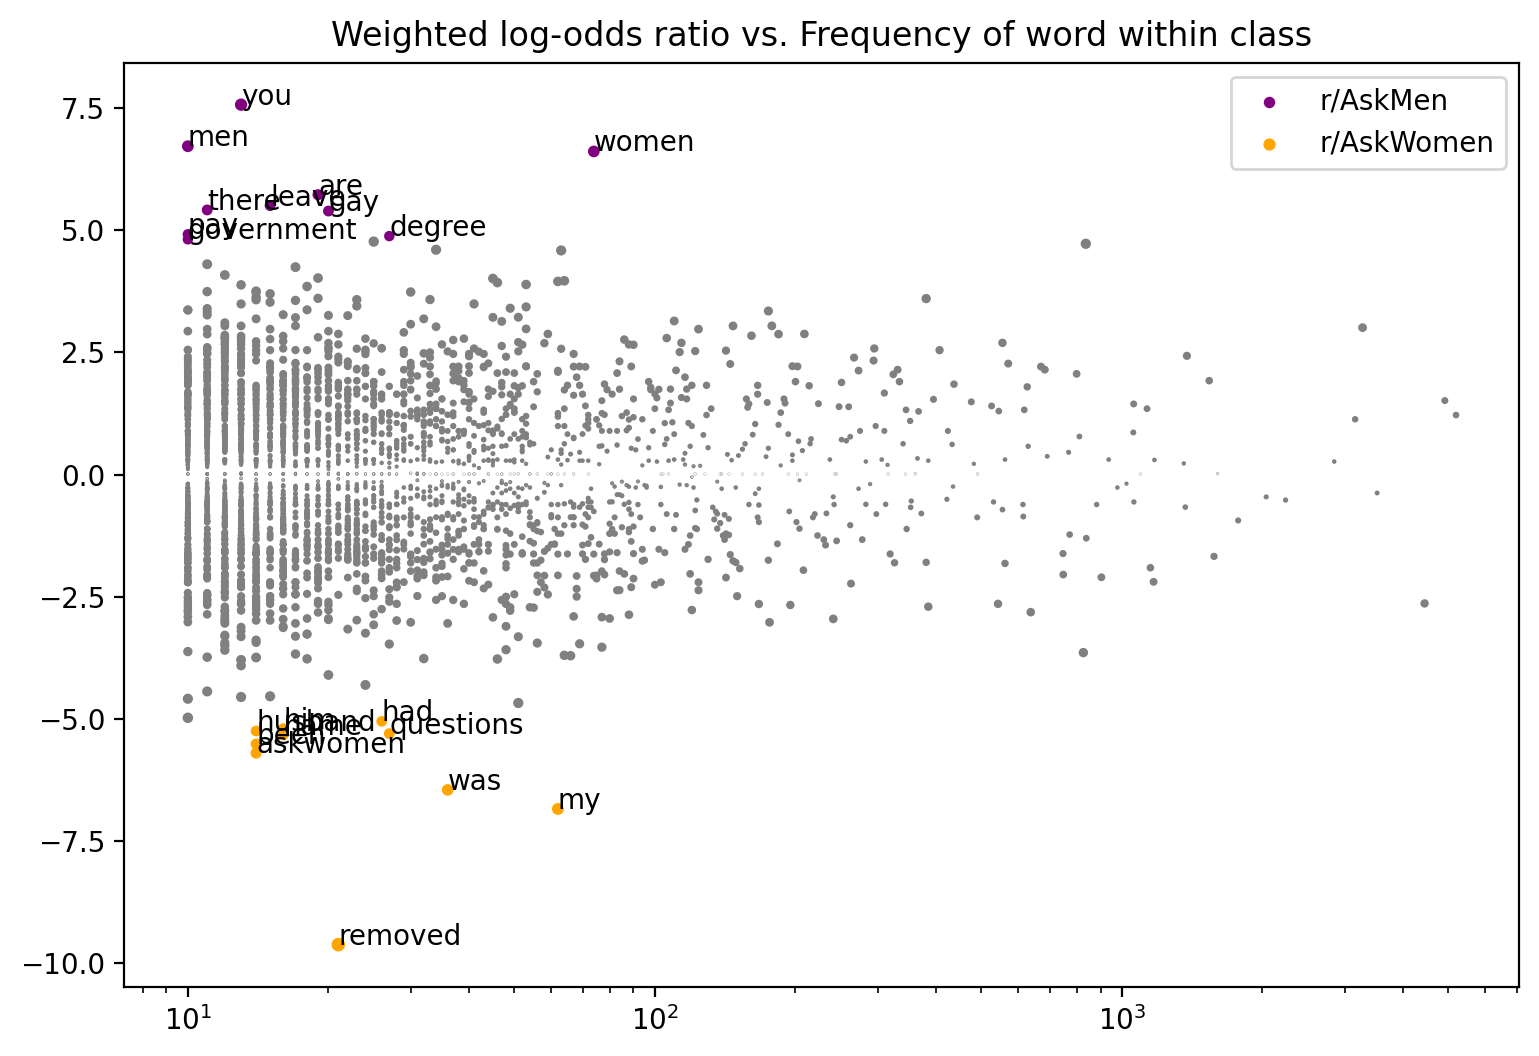

,z-score,class
ngram,,
removed,-9.628704,r/AskWomen
my,-6.848877,r/AskWomen
was,-6.458946,r/AskWomen
askwomen,-5.705605,r/AskWomen
been,-5.519920,r/AskWomen
...,...,...
leave,5.507459,r/AskMen
are,5.729650,r/AskMen
women,6.616405,r/AskMen


In [49]:
fw = FightingWords(ngram_range=(1,2))




fw.fit(reddit_corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'AskMen',
                     class2_func=lambda utt: utt.meta['subreddit'] == 'AskWomen')
                    
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/AskMen', class2_name='r/AskWomen')


df



Research Question: We are looking at the AskMen and AskWomen subreddits. Within these subreddits, we are specifically analyzing the text content of the utterances that are gilded. We will then determine the prevalence of the fighting words within the gilded utterances vs the non-gilded utterances.

Hypothesis: We expect that gilded content will contain fewer fighting words.

Now write down in this text cell some things that you found. How did the results compare to your expectations? Was there anything that surprised you? Is there anything you would do differently?